# Решающие деревья

![](https://drive.google.com/uc?id=13kmqLXa-3FBUJq0Q3XVOkz8TENpVTkqk)

*Source: https://www.upnxtblog.com/index.php/2017/12/06/17-machine-learning-algorithms-that-you-should-know/*

## Идея решающего дерева

Пройдемся оп основным идеям с лекции. На каждом этапе мы хотим разбивать вершину дерева на две других вершины. Делать мы это хотим таким образом, чтобы энтропия каждой последующей вершины была как можно меньше. Данную идею можно перевести на математический язык следующим образом:

$$H(X_m) - \frac{|X_l|}{|X_m|}H(X_l) - \frac{|X_r|}{|X_m|}H(X_r)$$

Критерий ошибки:

$$
Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t}
$$

Следуя нашей идее, мы хотим максимизировать данное выражение. Что мы считаем под мерой неопределенности? Начнем с задачи регрессии. Для функции потерь MSE:

$$H(X_m) = \frac{1}{|X_m|}\min_{c \in Y} \sum_{(x_i, y_i) \in X_m}{}(y_i - c)^2$$

Для MAE:

$$H(X_m) = \frac{1}{|X_m|}\min_{c \in Y} \sum_{(x_i, y_i) \in X_m}{}\frac{|y_i - MEDIAN(Y)|}{|X_m|}$$

И для классификации:

$$H(X_m) = -\sum_{k=1}^{K}p_klog(p_k)$$

или (помните название этой формулы?):

$$H(X_m) = -\sum_{k=1}^{K}p_k(1 - p_k)$$

### Ответье на вопросы:

1.  Какие методы регуляризации деревьев вы знаете?

2.  Сильно ли изменится дерево от небольшого изменения данных?

3.  Как происходит предсказание с использовании дерева при задачи классификации/регрессии?

4.  Как бы вы оценивали важность признаков при использовании решающего дерева?

Сами по себе решающие деревья используются в машинном обучении относительно редко, однако очень распространены методы, основанные на их композиции - ансамблях (Random Forest, XGBoost, LightGBM), о которых мы поговорим на дальнейших занятиях.

## Линейные модели или решающие деревья?

Раньше мы разбирали только линейные модели, которые имеют совсем другую природу по отношению к решающим деревьям. Можно ли сказать, что какой-то из этих двух типов моделей всегда лучше? Нет. В зависимости от пространственной структуры данных, один из них будет работать лучше:

- Линейная модель, если данные хорошо линейно разделимы

- Решающие деревья, если данные плохо линейно разделимы (присутствуют только кусочно-линейные или нелинейные зависимости)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams["figure.figsize"] = (11, 6.5)

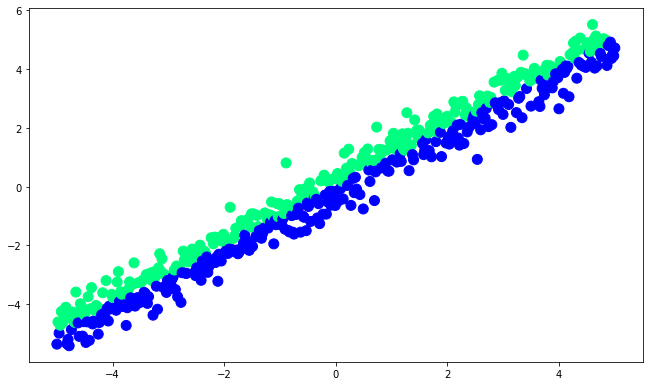

In [2]:
np.random.seed(13)
n = 500
X = np.zeros(shape=(n, 2))
X[:, 0] = np.linspace(-5, 5, 500)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=n)
y = (X[:, 1] > X[:, 0]).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="winter")
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=13
)

lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Linear model accuracy: {accuracy_score(y_pred_lr, y_test):.2f}")

Linear model accuracy: 0.99


In [ ]:
# !pip install mlxtend

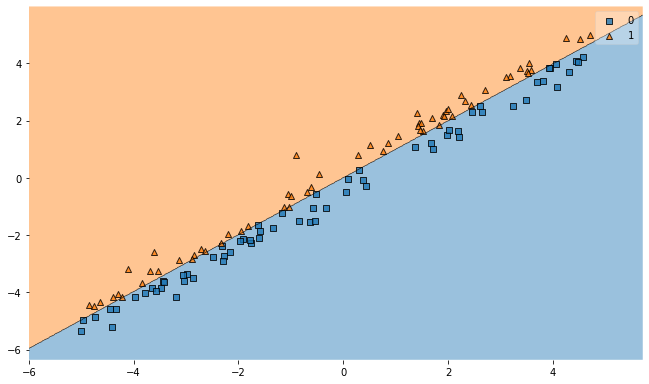

In [4]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_test, y_test, lr)

plt.show()

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Decision tree accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

Decision tree accuracy: 0.86


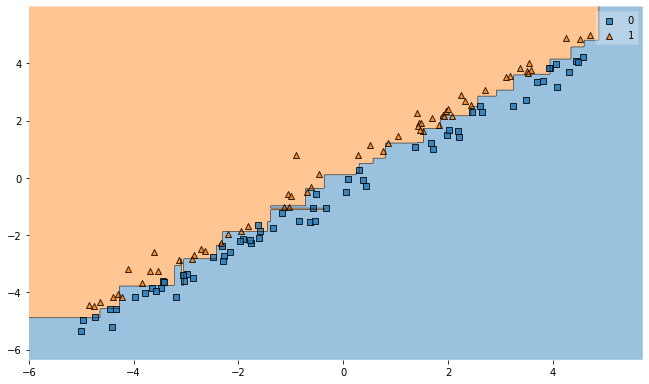

In [6]:
plot_decision_regions(X_test, y_test, dt)
plt.show()

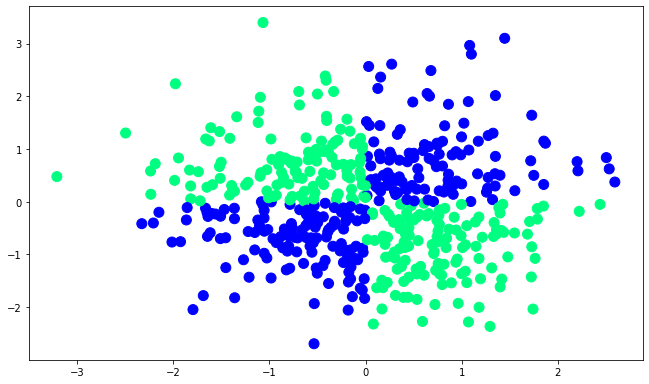

In [7]:
np.random.seed(13)
X = np.random.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="winter")
plt.show()

Linear model accuracy: 0.39


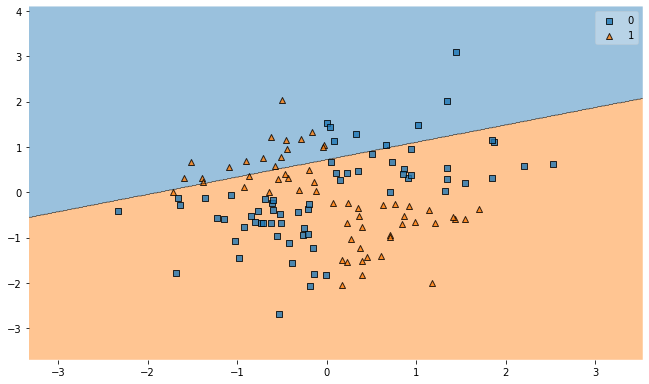

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=13
)

lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Linear model accuracy: {accuracy_score(y_pred_lr, y_test):.2f}")

plot_decision_regions(X_test, y_test, lr)
plt.show()

Linear model accuracy: 1.00


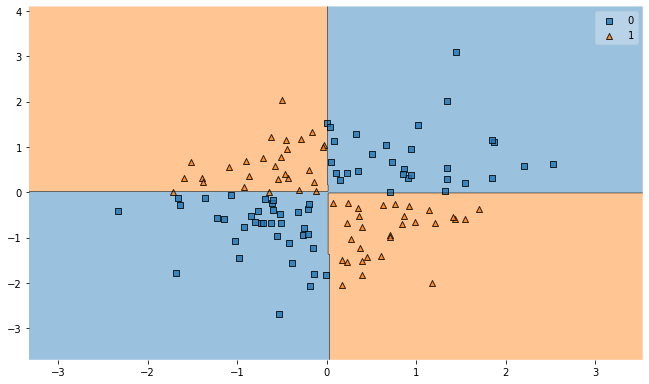

In [17]:
dt = DecisionTreeClassifier(random_state=13, max_depth=6, min_samples_leaf=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Linear model accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

plot_decision_regions(X_test, y_test, dt)
plt.show()

## Переобучение

На лекции рассказывалось, что решающие деревья способны переобучиться под любую выборку, если их никак не регуляризовать: при большом количестве листьев для каждого объекта может выделиться своя область в признаковом пространстве. По сути дерево просто выучивает обучающую выборку, но выделяет никаких закономерностей среди данных. Давайте убедимся в этом эффекте на практике, сгенерировав два трудноразделимых множества объектов.

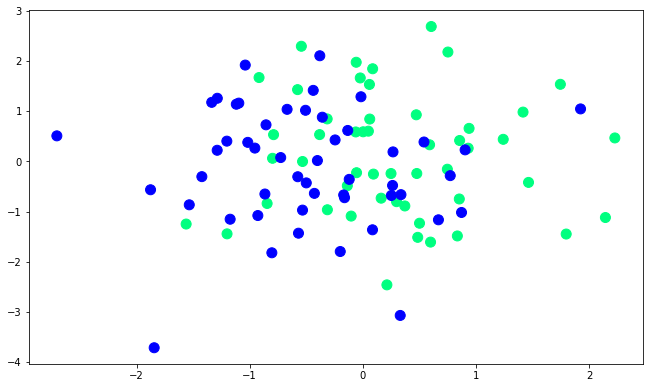

In [19]:
np.random.seed(15)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.25
X[50:, :] -= 0.25
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="winter")
plt.show()

Посмотрим, как влияют разные значения гиперпараметров решающего дерева на его структуру:

- `max_depth`: максимальная глубина дерева
- `min_samples_leaf`: минимальное число объектов в вершине дерева, необходимое для того, чтобы она стала листовой

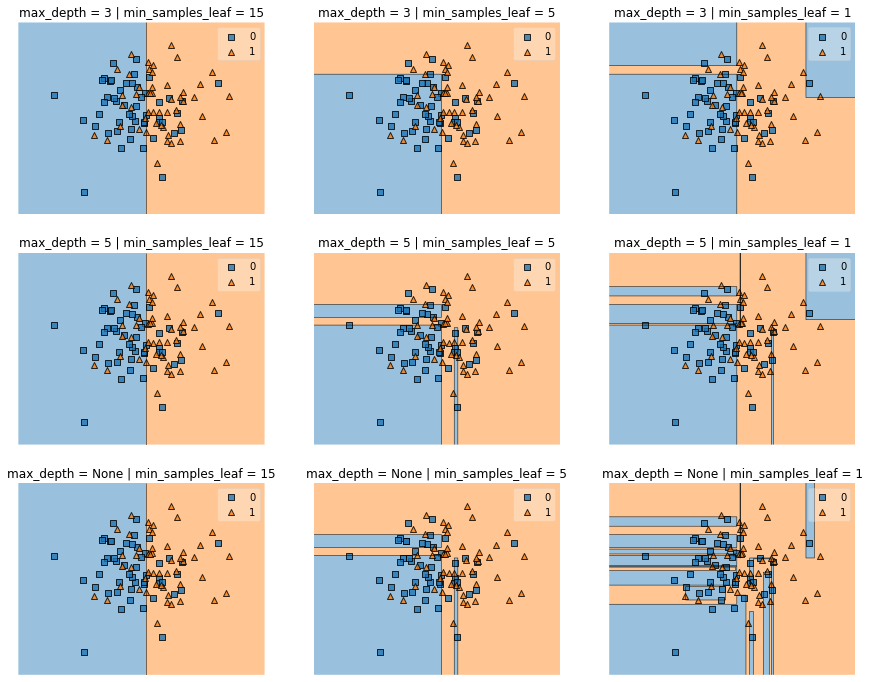

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, max_depth in enumerate([3, 5, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        dt = DecisionTreeClassifier(
            max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13
        )
        dt.fit(X, y)
        ax[i][j].set_title(
            "max_depth = {} | min_samples_leaf = {}".format(max_depth, min_samples_leaf)
        )
        ax[i][j].axis("off")
        plot_decision_regions(X, y, dt, ax=ax[i][j])

plt.show()

На любой выборке (исключая те, где есть объекты с одинаковыми значениями признаков, но разными ответами) можно получить нулевую ошибку - с помощью максимально переобученного дерева:

Decision tree accuracy: 0.80


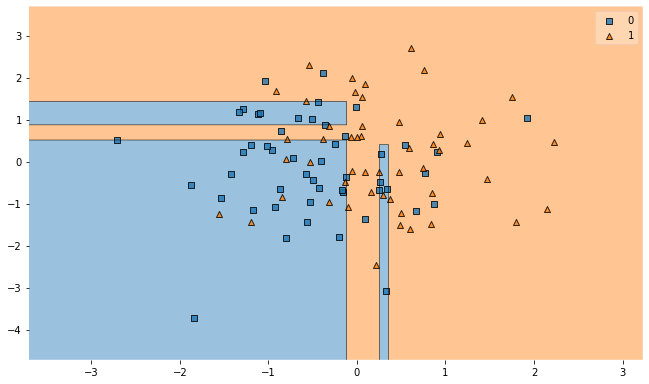

In [26]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=13)
dt.fit(X, y)

print(f"Decision tree accuracy: {accuracy_score(y, dt.predict(X)):.2f}")

plot_decision_regions(X, y, dt)
plt.show()

## Неустойчивость

Посмотрим, как будет меняться структура дерева, если брать для обучения разные 90%-ые подвыборки исходной выборки.

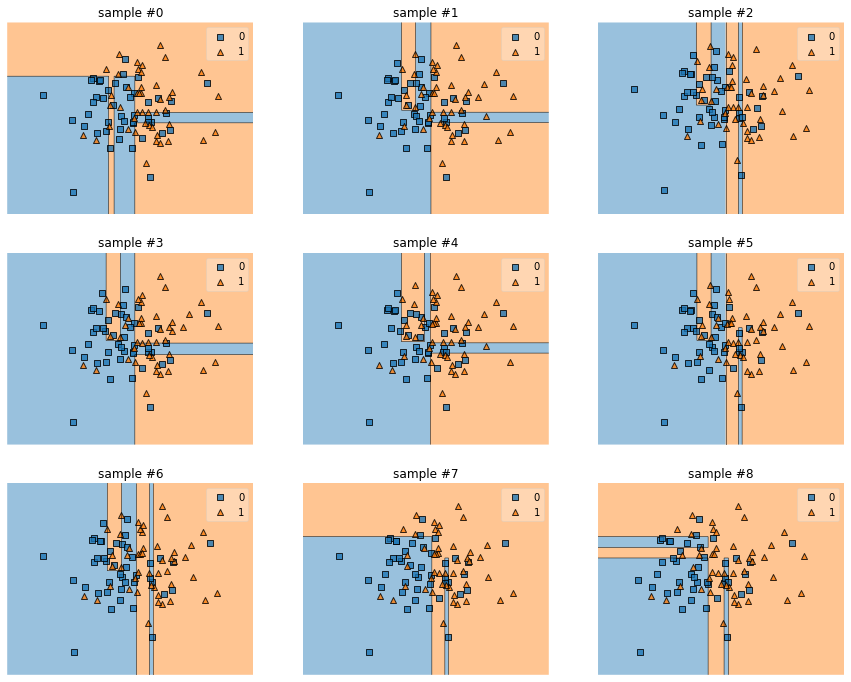

In [31]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        seed_idx = 3 * i + j
        np.random.seed(seed_idx)
        dt = DecisionTreeClassifier(random_state=13, max_depth=4, min_samples_leaf=5)
        idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
        X_part, y_part = X[idx_part, :], y[idx_part]
        dt.fit(X_part, y_part)
        ax[i][j].set_title("sample #{}".format(seed_idx))
        ax[i][j].axis("off")
        plot_decision_regions(X_part, y_part, dt, ax=ax[i][j])

plt.show()

## Практика

In [32]:
import pandas as pd

# from sklearn.datasets import load_boston

In [ ]:
ls

In [35]:
boston = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/seminars/sem12_trees/Boston.csv")
boston = boston.drop(["Unnamed: 0"], axis=1)

In [36]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [37]:
boston.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [38]:
X = pd.DataFrame(data=boston.drop("medv", axis=1))
y = boston["medv"]

print(f"Data shape: {X.shape}")
X.head()

Data shape: (506, 13)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [39]:
y[:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

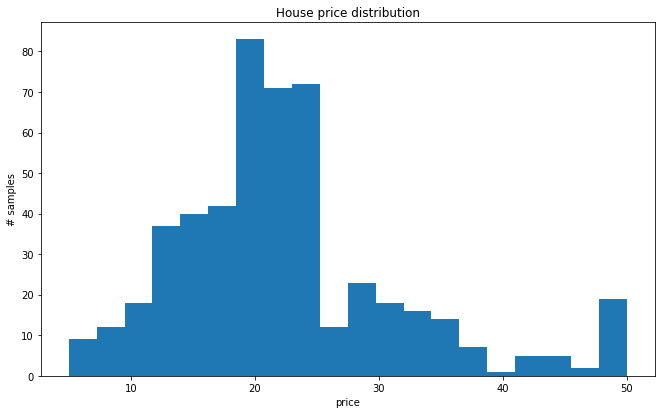

In [40]:
plt.title("House price distribution")
plt.xlabel("price")
plt.ylabel("# samples")
plt.hist(y, bins=20)
plt.show()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=13
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

### Решающее дерево: sklearn

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree

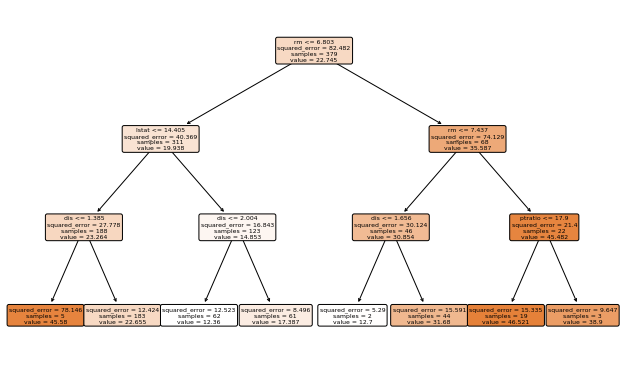

In [59]:
dt = DecisionTreeRegressor(max_depth=3, random_state=13)
dt.fit(X_train, y_train)

plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [61]:
mean_squared_error(y_test, dt.predict(X_test))

37.7071346843913

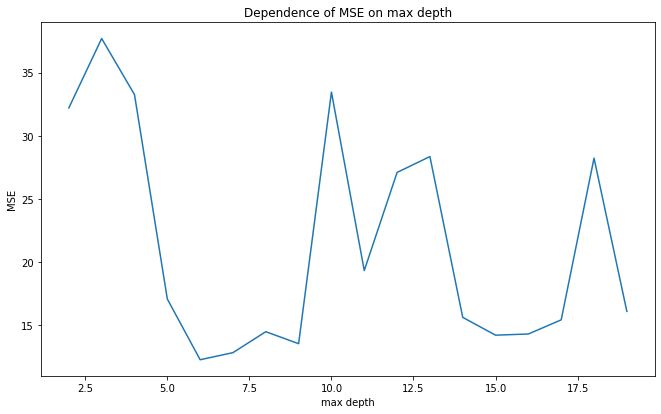

In [62]:
max_depth_array = range(2, 20)
mse_array = []

for max_depth in max_depth_array:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))

plt.plot(max_depth_array, mse_array)
plt.title("Dependence of MSE on max depth")
plt.xlabel("max depth")
plt.ylabel("MSE")
plt.show()

In [63]:
pd.DataFrame({"max_depth": max_depth_array, "MSE": mse_array}).sort_values(
    by="MSE"
).reset_index(drop=True)

,max_depth,MSE
0,6,12.259769
1,7,12.822513
2,9,13.531328
3,15,14.205564
4,16,14.299599
5,8,14.481238
6,17,15.420090
7,14,15.616905
8,19,16.090492
9,5,17.071137


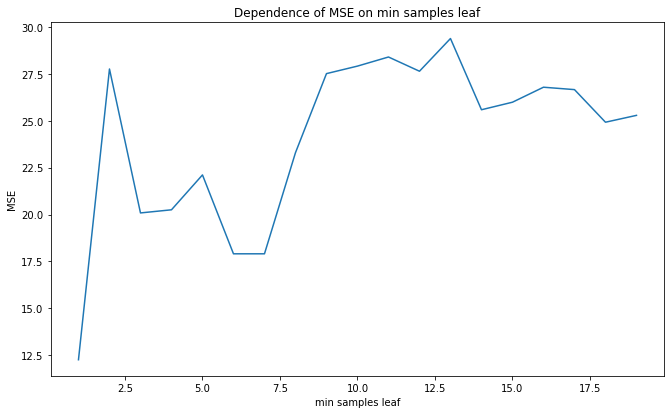

In [64]:
min_samples_leaf_array = range(1, 20)
mse_array = []

for min_samples_leaf in min_samples_leaf_array:
    dt = DecisionTreeRegressor(
        max_depth=6, min_samples_leaf=min_samples_leaf, random_state=13
    )
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))

plt.plot(min_samples_leaf_array, mse_array)
plt.title("Dependence of MSE on min samples leaf")
plt.xlabel("min samples leaf")
plt.ylabel("MSE")
plt.show()

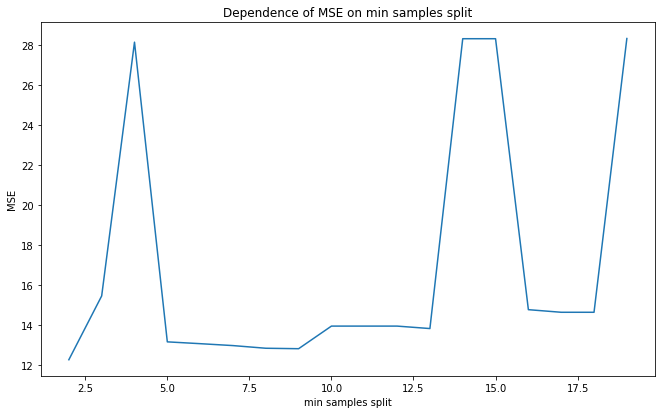

In [65]:
min_samples_split_array = range(2, 20)
mse_array = []

for min_samples_split in min_samples_split_array:
    dt = DecisionTreeRegressor(
        max_depth=6, min_samples_split=min_samples_split, random_state=13
    )
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))

plt.plot(min_samples_split_array, mse_array)
plt.title("Dependence of MSE on min samples split")
plt.xlabel("min samples split")
plt.ylabel("MSE")
plt.show()

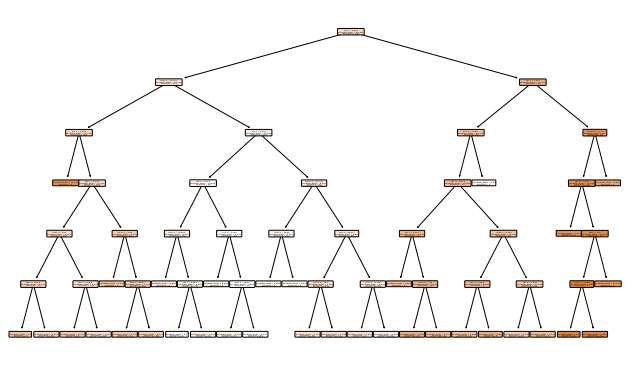

In [69]:
dt = DecisionTreeRegressor(max_depth=6, min_samples_split=9, random_state=13)
dt.fit(X_train, y_train)
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [70]:
mean_squared_error(y_test, dt.predict(X_test))

12.811753334869444

In [71]:
dt.feature_importances_

array([0.0014653 , 0.        , 0.00361076, 0.        , 0.02665365,
       0.60931705, 0.00488592, 0.11494467, 0.00337797, 0.02432941,
       0.00518642, 0.00598003, 0.20024881])

In [72]:
pd.DataFrame({"feature": X.columns, "importance": dt.feature_importances_}).sort_values(
    by="importance", ascending=False
).reset_index(drop=True)

,feature,importance
0,rm,0.609317
1,lstat,0.200249
2,dis,0.114945
3,nox,0.026654
4,tax,0.024329
5,black,0.005980
6,ptratio,0.005186
7,age,0.004886
8,indus,0.003611
9,rad,0.003378


Влияет ли стандартизация (масштабирование) признаков на результат работы решающего дерева?

In [73]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26
207,0.25199,0.0,10.59,0,0.489,5.783,72.7,4.3549,4,277,18.6,389.43,18.06
110,0.10793,0.0,8.56,0,0.520,6.195,54.4,2.7778,5,384,20.9,393.49,13.00


In [74]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = pd.DataFrame(
    sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index
)
X_test_scaled = pd.DataFrame(
    sc.transform(X_test), columns=X_test.columns, index=X_test.index
)
X_train_scaled.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
61,-0.382049,0.606785,-0.848363,-0.260011,-0.851779,-0.488599,0.896957,1.486665,-0.159888,-0.690253,0.592093,0.185671,0.285327
97,-0.388162,-0.486443,-1.176083,-0.260011,-0.922106,2.624087,0.271248,-0.164958,-0.859089,-0.737557,-0.214771,0.404139,-1.192625
13,-0.327024,-0.486443,-0.407990,-0.260011,-0.104556,-0.513761,-0.239387,0.437534,-0.626022,-0.554256,1.209107,0.404139,-0.607512
207,-0.372405,-0.486443,-0.049546,-0.260011,-0.535308,-0.759460,0.152580,0.262298,-0.626022,-0.731644,0.070004,0.317425,0.808317
110,-0.389711,-0.486443,-0.346542,-0.260011,-0.262791,-0.149652,-0.505493,-0.521493,-0.509488,-0.098960,1.161645,0.364554,0.077287


In [75]:
print("No scaling is applied\n")

for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    print(
        f"MSE on test set for depth {max_depth}: {mean_squared_error(y_test, dt.predict(X_test)):.2f}"
    )

No scaling is applied

MSE on test set for depth 3: 37.71
MSE on test set for depth 6: 12.26


In [76]:
print("Standard scaling is applied\n")

for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train_scaled, y_train)
    print(
        f"MSE on test set for depth {max_depth}: {mean_squared_error(y_test, dt.predict(X_test_scaled)):.2f}"
    )

Standard scaling is applied

MSE on test set for depth 3: 37.71
MSE on test set for depth 6: 12.26
